### Student Information
Name: 賴彥霖

Student ID: NTHU - 112061591

GitHub ID: WalterOuO

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

### **First: Take home exercise**

#### **Library import and Data load**

In [69]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

In [72]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [73]:
# add columns to the dataframe
X['category'] = twenty_train.target
X['category_name'] = X['category'].map({a:b for a,b in enumerate(twenty_train.target_names)})

#### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [74]:
#Answer here
# Print the first 5 rows of the column 'category'
print(X.loc[:5, 'category'])
print(X.head())
print()

# Add a new column 'Cat' and set the first row of it ='cuttie' to the dataframe
X.at[0,'Cat'] = 'cuttie'                            # at是用來指定[第幾列, "label"行]的值，可以拿來賦值
print(X.head())
print("-"*100)

# iat is used to set the value of the 3rd row of the column 'Cat' to 'doggy'
X.iat[2, X.columns.get_loc('Cat')] = 'doggy'        # iat是用來指定[第幾列, 第幾行(行的index)]的值，可以拿來賦值
print(X.head())
print("-"*100)

# drop(remove) the column 'Cat' from the dataframe
X.drop(columns=['Cat'], inplace=True)               # drop是用來刪除資料的，可以指定要刪除的是什麼行/列，inplace=True是直接在原本的資料上刪除
print(X.head())

# get the first 5 rows for each 10 rows of the dataframe where the category == 3
X.loc[X['category'] == 3][::10][:5]

0    1
1    1
2    3
3    3
4    3
5    3
Name: category, dtype: int64
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc

text  category  \
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
27   From: ruthless@panix.com (Ruth Ditucci) Subjec...         3   
70   From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
124  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
163  From: tbrent@ecn.purdue.edu (Timothy J Brent) ...         3   

              category_name  
2    soc.religion.christian  
27   soc.religion.christian  
70   soc.religion.christian  
124  soc.religion.christian  
163  soc.religion.christian

####  **>>>Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [75]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [76]:
NA_df['missing_example'].isnull().to_frame()

missing_example
0             True
1             True
2            False
3            False
4             True
5            False

**Answer here:**  
C, D are the string 'NaN' and 'None' in missing_example column, so isnull() cannot detect it as missing value  
F is an empty string, so isnull() cannot detect it as missing value  
for A, B, E, np.nan, nothing, and None are all missing values, so isnull() can detect it as missing value

#### **>>> Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [77]:
# Answer here
X_sample = X.sample(n=1000) #random state
X_sample1 = X.sample(frac=0.05, random_state=1)
X_sample2 = X.sample(frac=0.05, random_state=2)
print(X_sample1[:3])
print('-'*100)
print(X_sample2[:3])

sample_observation = [{"shape":X.shape, "length":len(X), 
                       "por_category_0":round(len(X.loc[X['category'] == 0])/len(X),2),
                       "por_category_1":round(len(X.loc[X['category'] == 1])/len(X),2),
                       "por_category_2":round(len(X.loc[X['category'] == 2])/len(X),2),
                       "por_category_3":round(len(X.loc[X['category'] == 3])/len(X),2),
                       "por_cate_name_alt":round(len(X.loc[X['category_name'] == 'alt.atheism'])/len(X),2),
                       "por_cate_name_soc":round(len(X.loc[X['category_name'] == 'soc.religion.christian'])/len(X),2),
                       "por_cate_name_comp":round(len(X.loc[X['category_name'] == 'comp.graphics'])/len(X),2),
                       "por_cate_name_sci":round(len(X.loc[X['category_name'] == 'sci.med'])/len(X),2)},
                       {"shape":X_sample.shape, "length":len(X_sample),
                        "por_category_0":round(len(X_sample.loc[X_sample['category'] == 0])/len(X_sample),2),
                        "por_category_1":round(len(X_sample.loc[X_sample['category'] == 1])/len(X_sample),2),
                        "por_category_2":round(len(X_sample.loc[X_sample['category'] == 2])/len(X_sample),2),
                        "por_category_3":round(len(X_sample.loc[X_sample['category'] == 3])/len(X_sample),2),
                        "por_cate_name_alt":round(len(X_sample.loc[X_sample['category_name'] == 'alt.atheism'])/len(X_sample),2),
                        "por_cate_name_soc":round(len(X_sample.loc[X_sample['category_name'] == 'soc.religion.christian'])/len(X_sample),2),
                        "por_cate_name_comp":round(len(X_sample.loc[X_sample['category_name'] == 'comp.graphics'])/len(X_sample),2),
                        "por_cate_name_sci":round(len(X_sample.loc[X_sample['category_name'] == 'sci.med'])/len(X_sample),2)}
                      ]
observation_table= pd.DataFrame(sample_observation, index=['X', 'X_sample'])
observation_table

                                                   text  category  \
367   From: echen@burn.ee.washington.edu (Ed Chen) S...         1   
2108  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
2170  From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...         0   

      category_name  
367   comp.graphics  
2108    alt.atheism  
2170    alt.atheism  
----------------------------------------------------------------------------------------------------
                                                   text  category  \
1460  From: mpaul@unl.edu (marxhausen paul) Subject:...         3   
1632  From: khan0095@nova.gmi.edu (Mohammad Razi Kha...         1   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   

               category_name  
1460  soc.religion.christian  
1632           comp.graphics  
259              alt.atheism  


shape  length  por_category_0  por_category_1  por_category_2  \
X         (2257, 3)    2257            0.21            0.26            0.26   
X_sample  (1000, 3)    1000            0.22            0.24            0.28   

          por_category_3  por_cate_name_alt  por_cate_name_soc  \
X                   0.27               0.21               0.27   
X_sample            0.26               0.22               0.26   

          por_cate_name_comp  por_cate_name_sci  
X                       0.26               0.26  
X_sample                0.24               0.28

**Observation:** Different samples will be generated with different random state. However, it shows that sample will keep the ratio of every category in 'category' column and 'category_name' column.

####  **>>>Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category distribution'}>

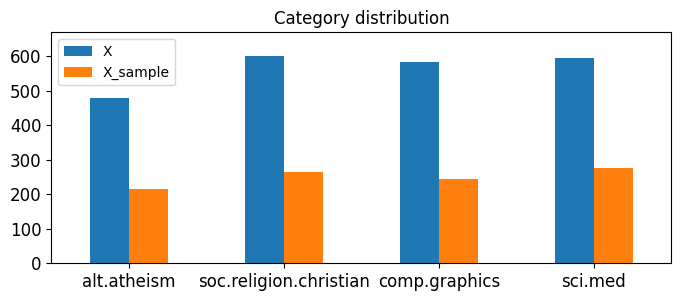

In [78]:
# Answer here
upper_bound = max(X.category_name.value_counts() + 70)
plt.style.use('fast')
# print(X.category_name.value_counts().shape)
two_bar = {'X':X.category_name.value_counts(), 'X_sample':X_sample.category_name.value_counts()}
two_bar = pd.DataFrame(two_bar, index=categories)
two_bar.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, upper_bound],
            rot = 0, fontsize = 12, figsize = (8,3))

#### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [79]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /house/walter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [80]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
exercise10 = X_counts[0:5, 0:100].toarray()
count = 0
for i, time in enumerate(exercise10[4]):
    if time == 1:
        count += 1
    if count == 2:
        target = i
        break
count_vect.get_feature_names_out()[target]

'01'

#### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [81]:
# Answer here
import seaborn as sns
plot_x = [str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_" + str(i) for i in list(X.index)]
plot_z = X_counts.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw = df_todraw.loc[:, (df_todraw != 0).any(axis=0)]
df_todraw = df_todraw.loc[(df_todraw != 0).any(axis=1), :]

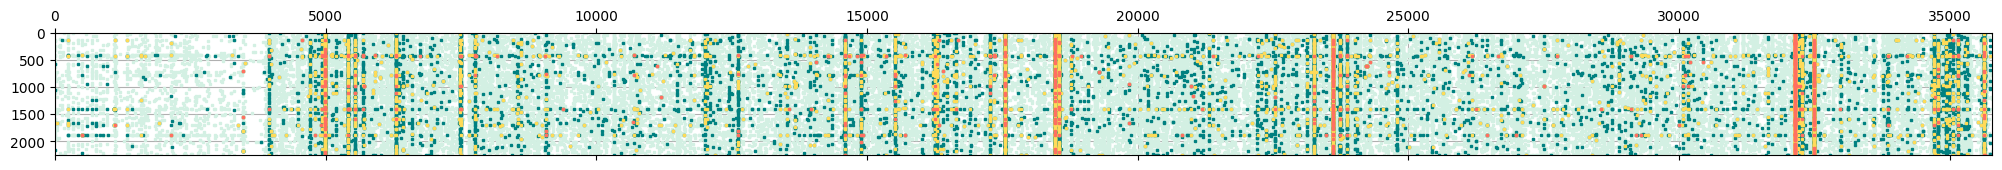

In [82]:
# Answer here
# spy plot is able to visualize the sparsity of a matrix, especially when the matrix is large
plt.subplots(figsize=(25, 15))
precisions = [1, 5, 10, 30]
colors = ['#d3f0e3','#008080', '#ffdb58', '#ff6f61']

for p, c in zip(precisions, colors):
    plt.spy(X_counts, precision = p, color = c, markersize=2)
plt.grid('on')
plt.show()

####  **>>>Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [83]:
# Answer here
term_frequencies = []
for j in range(0,X_counts.shape[1]):                            # shape[1]是取得X_counts的column數
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [84]:
import plotly.express as px

# Create the bar chart for plotly
df_plotly = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:300], 
                          'Frequency': term_frequencies[:300]})

fig = px.bar(df_plotly, x='Term', y='Frequency', title='First 300 Terms and Their Frequencies')

fig.update_layout(
    xaxis_title='Term',
    yaxis_title='Frequency',
    xaxis_tickangle=-90
)

fig.show()

####  **>>>Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [85]:
# Choose first 100 terms
df_plotly = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:100], 'Frequency': term_frequencies[:100]})
fig = px.bar(df_plotly, x='Term', y='Frequency', title='First 100 Terms and Their Frequencies')

fig.update_layout(
    xaxis_title='Term',
    yaxis_title='Frequency',
    xaxis_tickangle=-90
)

fig.show()

#### **>>>Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

<!-- ![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png) -->

In [86]:
# Sort with argsort, which will return a sorted list from small to large, [::-1] reverse it to from large to small
new_terms = count_vect.get_feature_names_out()[:100]
new_frequencies = term_frequencies[:100]

sorted_new_terms = new_terms[np.argsort(new_frequencies)[::-1]]
sorted_new_frequencies = new_frequencies[np.argsort(new_frequencies)[::-1]]

df_top_plotly = pd.DataFrame({
    'Term': sorted_new_terms,
    'Frequency': sorted_new_frequencies
})

fig_top = px.bar(df_top_plotly, x='Term', y='Frequency', title=f'Sorted First 100 Terms and Their Frequencies')

fig_top.update_layout(
    xaxis_title='Term',
    yaxis_title='Frequency',
    xaxis_tickangle=-90
)

fig_top.show()

#### **>>>Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [25]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies[:100]]

df_plotly = pd.DataFrame({'Term': count_vect.get_feature_names_out()[:100], 'Frequency': term_frequencies_log})
fig = px.bar(df_plotly, x='Term', y='Frequency', title='First 100 Terms and Their Frequencies')

fig.update_layout(
    xaxis_title='Term',
    yaxis_title='log_Frequency',
    xaxis_tickangle=-90
)

fig.show()

# Log scale helps highlight the differences in magnitude, especially when values vary greatly. 
# It makes smaller values more visible and compresses larger ones, making it easier to observe relative scales, 
# which can be more meaningful than the absolute values themselves in such cases.

#### **>>>Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

Answer: In all of category, Top 5.0% words are highly related to their realm. For example, sci,med is the abbreviation of science medicine, biology/medical word will highly occur in their aspect, like toxic(29),genetic(29),sun(29),answer(29),rose(29) will be the Top 5.0% words. Bottom 1.0% words are mostly rare word or hard word that we hardly use in writen language/speech/news/our life, like íålittin(1), icl(1), icgln(1), iceskate(1), icemt(1).

#### **>>>Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [2]:
from PAMI.frequentPattern.basic import FPGrowth as alg

# FAE Top-K with k = [500, 1000, 1500]
def FAE_TopK(iFile, k):
    obj = alg.FPGrowth(iFile=iFile, minSup=8)
    obj.mine()
    patterns = obj.getPatternsAsDataFrame()
    patterns = patterns.nlargest(k, 'Support')
    print(f"FAE Top-K with k={k} runtime: {str(obj.getRuntime())} seconds")
    print(patterns)

for k in [500, 1000, 1500]:
    FAE_TopK('td_freq_db_comp_graphics.csv', k)


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
FAE Top-K with k=500 runtime: 0.33022165298461914 seconds
                                              Patterns  Support
34054                                            maybe       26
34050                                             life       24
34051                                            ideas       24
34052                                             feel       24
34053                                            tried       24
...                                                ...      ...
4133         feel forum learn concerning awful curious       12
4134      feel forum proposed concerning awful curious       12
4135      feel learn proposed concerning awful curious       12
4136     personally forum learn proposed awful curious       12
4137   personally forum learn concerning awful curious       12

[500 rows x 2 columns]
Frequent patterns were generated successfully using frequentPatter

In [6]:
# MaxFPGrowth with minSup
def MaxFPGrowth(iFile, minSup):
    obj = alg.FPGrowth(iFile=iFile, minSup=minSup)
    obj.mine()
    patterns = obj.getPatternsAsDataFrame()
    print(f"MaxFPGrowth with minSup={minSup} runtime: {str(obj.getRuntime())} seconds")
    print(patterns)

for minSup in [9, 6]:        # minSup=3 will cause runtime error cause there are too many patterns included
    MaxFPGrowth('td_freq_db_comp_graphics.csv', minSup=minSup)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MaxFPGrowth with minSup=9 runtime: 1.071476936340332 seconds
         Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MaxFPGrowth with minSup=6 runtime: 0.3956737518310547 seconds
         Patterns  Support
0            cool        6
1            loop        6
2           patch        6
3            stay        6
4       intensity        6
...           ...      ...
564656       life       24
564657      ideas       24
564658       feel       24
564659      tried       24
564660      maybe       26

[564661 rows x 2 columns]


##### Observation  
We can observe that all of them have the words: ['life', 'ideas', 'feel', 'tried', 'maybe'], it seems that the results are same.  
However, when we look at the runtime, FAE Top-K are more faster than MaxFPGrowth, so next time use 'FAE Top-k'. 

#### **>>>Exercise 18 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [26]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup = 9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [27]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

In [29]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import umap.umap_
from umap import UMAP

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

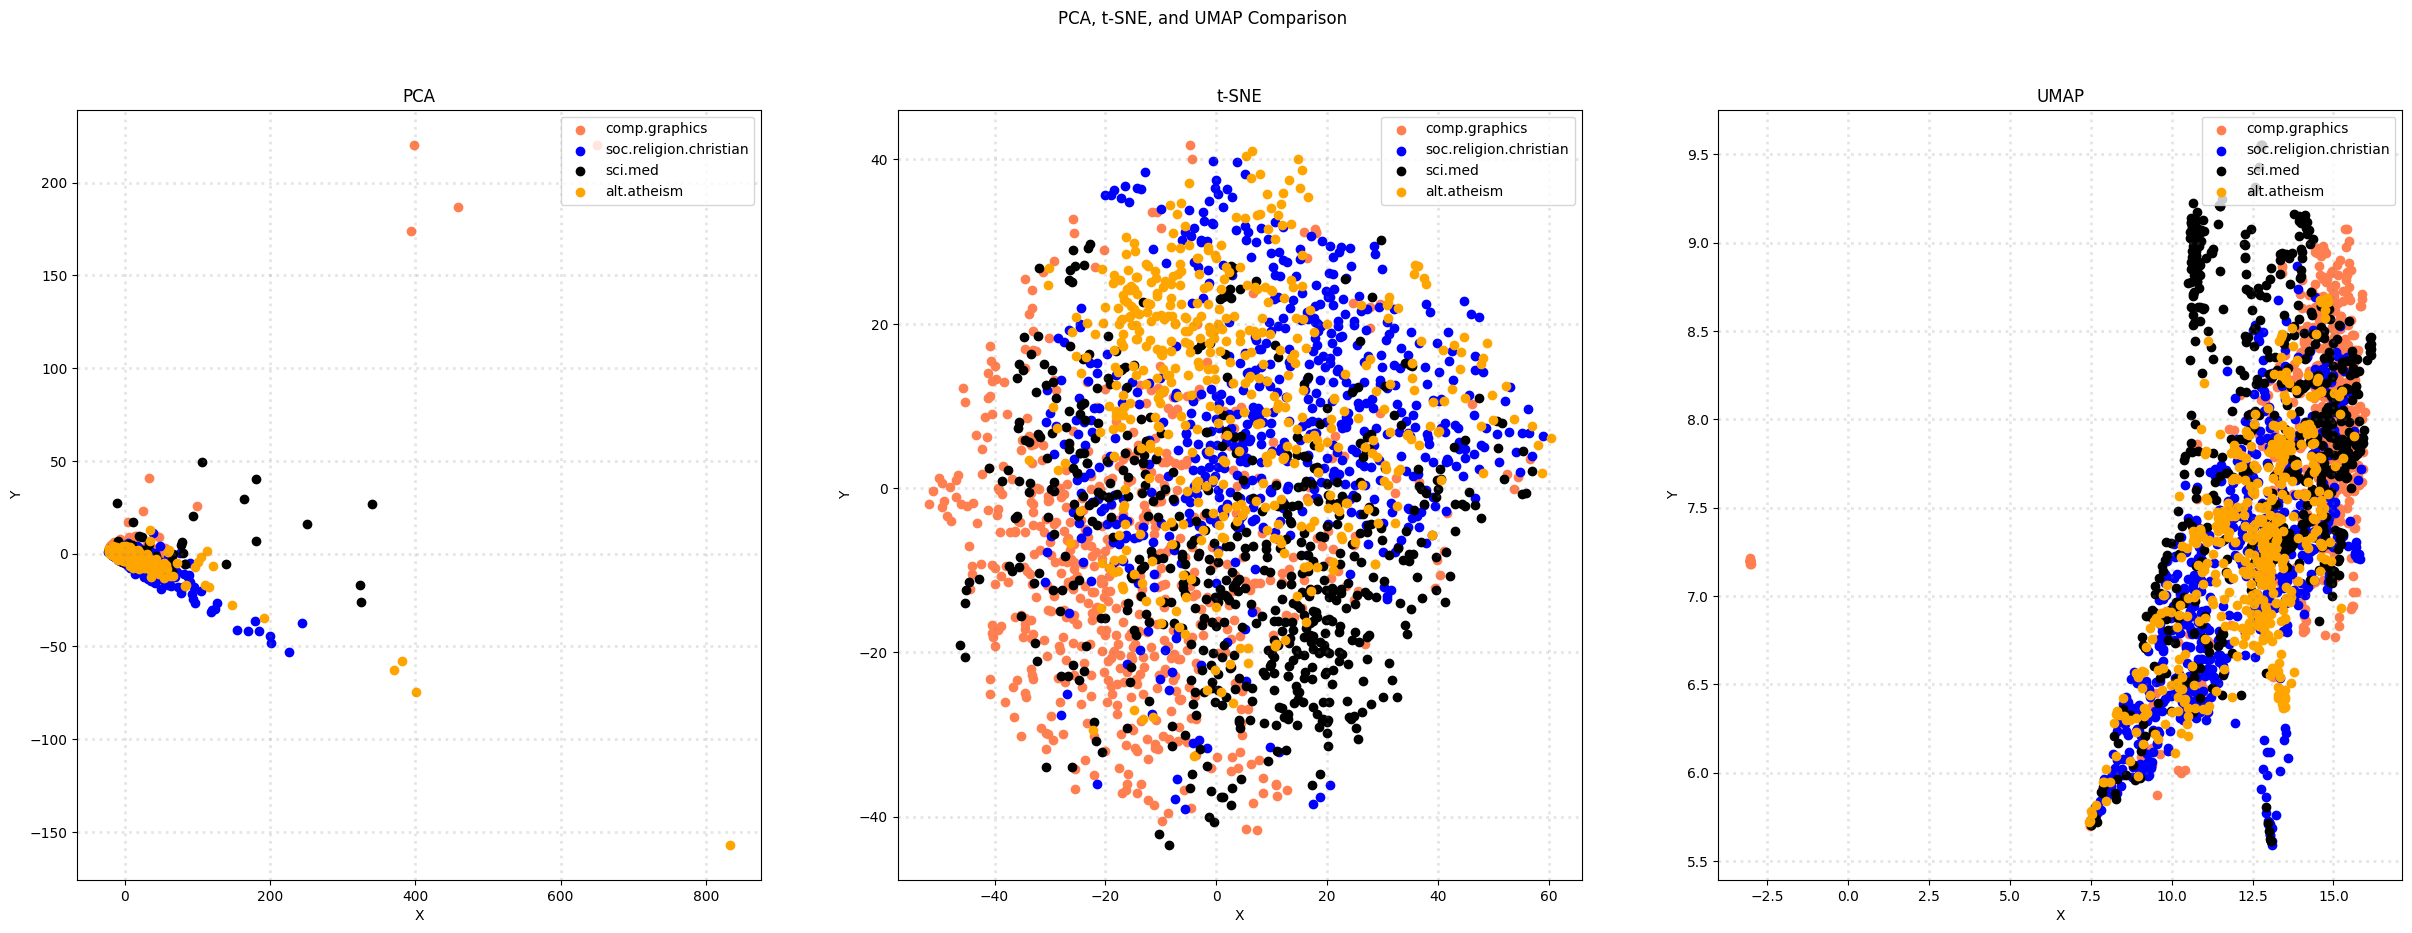

In [30]:
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()


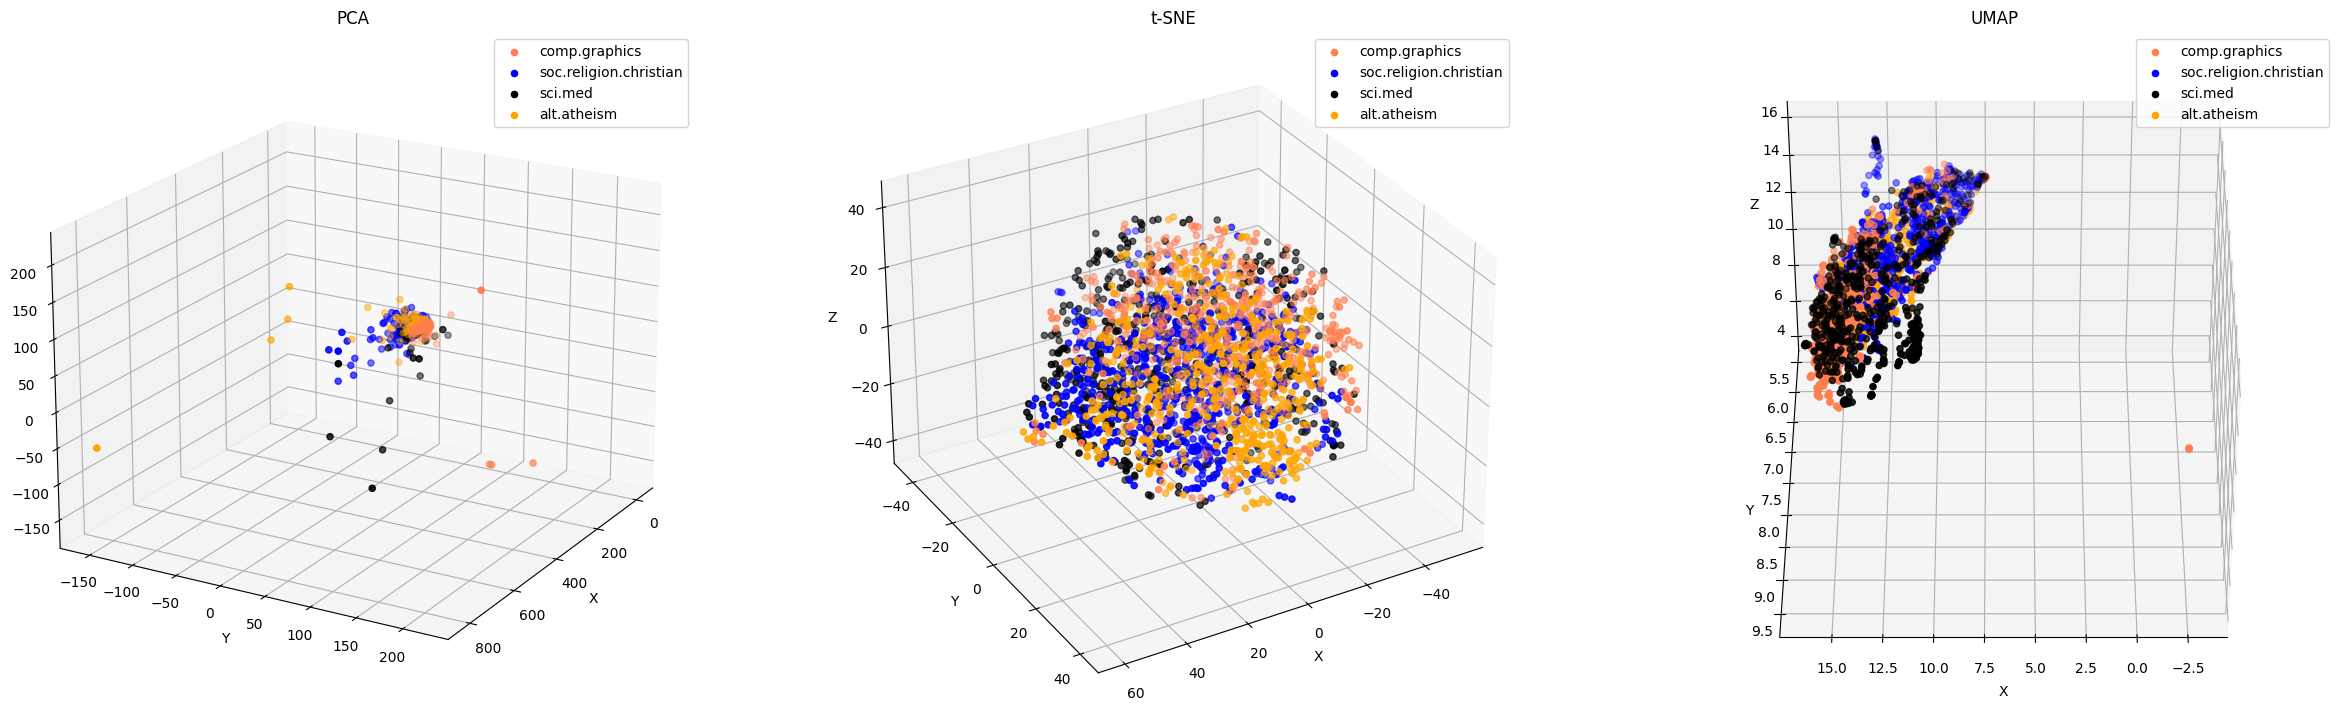

In [31]:
# Create a 3D scatter plot for each method
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

fig = plt.figure(figsize=(30, 10))

# Create 3D subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP')

# Set different camera positions
ax1.view_init(elev=20, azim=30)
ax2.view_init(elev=30, azim=60)
ax3.view_init(elev=40, azim=90)

plt.show()

#### **>>>Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?   Yes, it works.

In [32]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                     tokenized_text  \
0           comp.graphics  {(Programmer), this, City, utility), like, wou...   
1           comp.graphics  {this, curve, notation:, human,, loop, 28, i.e...   
2  soc.religion.christian  {(Darin, I'm, 11:25,, this, seriously, someone...   
3  soc.religion.christian  {NL, 1989., church, I'm, schools,, 10, in, rec...   
4  soc.religion.christian  {decision, NCR, Corp.,, this, article, feast.,...   
5  soc.religion.christian  {analogy, conviction, graduate, Indeed,, Hayes...   
6  soc.religion.christian  {>not, teach, 5:19-20], article, Don't, writes...   
7                 sci.med  {cause, bathwater, this, teenager., vitamin/mi...   
8                 sci.med  {Blindsight, contrary, thought, article, red-g...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]

### **Second: Apply on new dataset**

##### 1. Data Load & Combination

In [91]:
import os
import glob
from pathlib import Path
path = Path('./sentiment labelled sentences')
# get all the text file in the new data folder
file_list = list(path.glob("*.txt"))
print(file_list)

[PosixPath('sentiment labelled sentences/amazon_cells_labelled.txt'), PosixPath('sentiment labelled sentences/yelp_labelled.txt'), PosixPath('sentiment labelled sentences/imdb_labelled.txt'), PosixPath('sentiment labelled sentences/readme.txt')]


In [92]:
# In the README.txt file of 'sentiment labelled sentences', it is mentioned that the format of the data is as follows:
sentence, score, file = [], [], []
for filepath in file_list:
    with open(filepath, 'r') as f:
        # read line by line
        for line in f:
            # To eliminate the empty lines
            if len(line.strip().split('\t')) != 2:
                continue
            sentence.append(line.strip().split('\t')[0])
            score.append(line.strip().split('\t')[1])
            file.append(filepath.name.split('.')[0])

In [93]:
len(sentence), len(score), len(file)

(3000, 3000, 3000)

In [94]:
df = pd.DataFrame({'sentence': sentence, 'score': score, 'file': file})
print(df.shape)
df.head()

(3000, 3)


sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   

                    file  
0  amazon_cells_labelled  
1  amazon_cells_labelled  
2  amazon_cells_labelled  
3  amazon_cells_labelled  
4  amazon_cells_labelled

##### 2. Data Mining

In [95]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                 file  
0  The amoung of missing records is:   
1                                   0

In [96]:
print(sum(df['sentence'].duplicated()))
df.shape

17


(3000, 3)

In [97]:
df.drop_duplicates(keep=False, inplace=True)
df.shape

(2966, 3)

##### 3. Data Preprocessing

Sampling

In [98]:
df_sample = df.sample(n=1000,random_state=42)

print(df.shape)
print(df_sample.shape)

(2966, 3)
(1000, 3)


In [99]:
df_categories = df['file'].unique()
df_categories

array(['amazon_cells_labelled', 'yelp_labelled', 'imdb_labelled'],
      dtype=object)

In [100]:
# To get the number of each score in each file
df_score_count = df.score.value_counts()
df_sample_score_count = df_sample.score.value_counts()
df_amazon = df_sample[df_sample['file'] == 'amazon_cells_labelled'].score.value_counts()
df_yelp = df_sample[df_sample['file'] == 'yelp_labelled'].score.value_counts()
df_imdb = df_sample[df_sample['file'] == 'imdb_labelled'].score.value_counts()

# print(df_score_count)
# print(df_sample_score_count)
# print(df_amazon)
# print(df_yelp)
# print(df_imdb)

<Axes: title={'center': 'Category distribution'}, xlabel='score'>

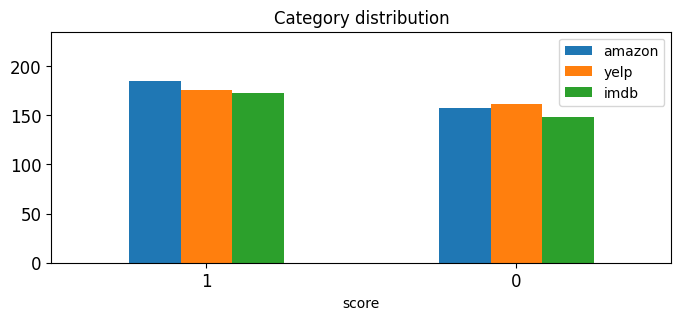

In [101]:
plt.style.use('fast')
score_distribution = pd.DataFrame({'amazon':df_amazon,
                                   'yelp':df_yelp,
                                   'imdb':df_imdb})
upper_bound = max(max(df_amazon), max(df_yelp), max(df_imdb)) + 50
score_distribution.plot(kind = 'bar',
                        title = 'Category distribution',
                        ylim = [0, upper_bound],
                        rot = 0, fontsize = 12, figsize = (8,3))

Feature Creation

In [102]:
import nltk
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df[:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

Feature Dubset Selection

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)
print(df_counts[0].shape)
print(df_counts[0])

(1, 5153)
  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


In [104]:
print(count_vect.get_feature_names_out()[4159])
print(count_vect.get_feature_names_out()[4543])
print(count_vect.get_feature_names_out()[2426])

so
there
is


In [105]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [106]:
print(df_counts.shape)

(2966, 5153)


In [107]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

Plot the frequency of the 10 most commonly used terms in the first 5 sentence.

(5, 10)


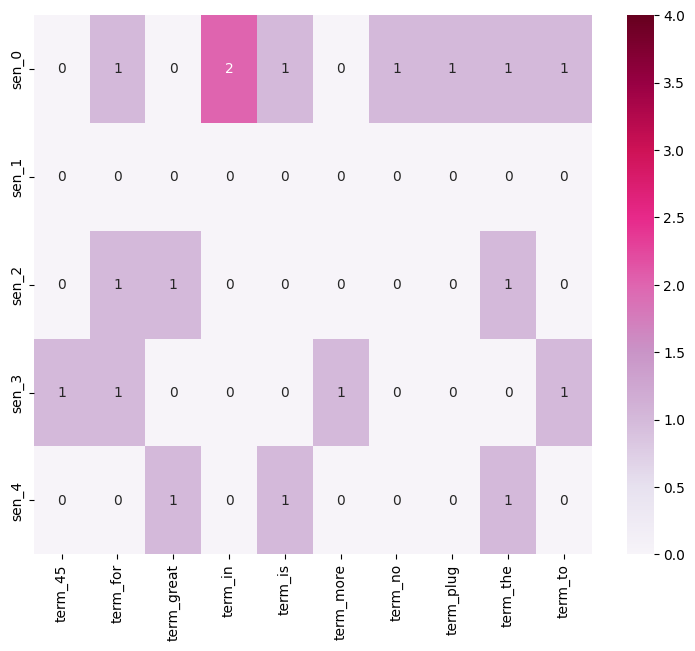

In [108]:
import seaborn as sns
df_five = df[:5]
count_vect_top10 = CountVectorizer(max_features=10)
df_counts_10 = count_vect_top10.fit_transform(df_five.sentence) #learn the vocabulary and return document-term matrix
print(df_counts_10.shape)
plot_x = ["term_"+str(i) for i in count_vect_top10.get_feature_names_out()]
plot_y = ["sen_"+ str(i) for i in list(df_five.index)]
plot_z = df_counts_10.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

Attribute Transformation / Aggregation

In [109]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):                            # shape[1]是取得X_counts的column數
    term_frequencies.append(sum(df_counts[:,j].toarray()))
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

/tmp/ipykernel_2514377/355454013.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'the'),
 Text(1, 0, 'and'),
 Text(2, 0, 'it'),
 Text(3, 0, 'is'),
 Text(4, 0, 'to'),
 Text(5, 0, 'this'),
 Text(6, 0, 'of'),
 Text(7, 0, 'was'),
 Text(8, 0, 'in'),
 Text(9, 0, 'for'),
 Text(10, 0, 'that'),
 Text(11, 0, 'not'),
 Text(12, 0, 'with'),
 Text(13, 0, 'my'),
 Text(14, 0, 'very'),
 Text(15, 0, 'good'),
 Text(16, 0, 'on'),
 Text(17, 0, 'you'),
 Text(18, 0, 'but'),
 Text(19, 0, 'great'),
 Text(20, 0, 'have'),
 Text(21, 0, 'movie'),
 Text(22, 0, 'are'),
 Text(23, 0, 'as'),
 Text(24, 0, 'so'),
 Text(25, 0, 'film'),
 Text(26, 0, 'phone'),
 Text(27, 0, 'be'),
 Text(28, 0, 'all'),
 Text(29, 0, 'one'),
 Text(30, 0, 'had'),
 Text(31, 0, 'at'),
 Text(32, 0, 'food'),
 Text(33, 0, 'like'),
 Text(34, 0, 'just'),
 Text(35, 0, 'time'),
 Text(36, 0, 'there'),
 Text(37, 0, 'place'),
 Text(38, 0, 'service'),
 Text(39, 0, 'an'),
 Text(40, 0, 'they'),
 Text(41, 0, 'we'),
 Text(42, 0, 'were'),
 Text(43, 0, 'from'),
 Text(44, 0, 'really'),
 Text(45, 0, 'bad'),
 Text(46, 0, 'if'),
 Text(

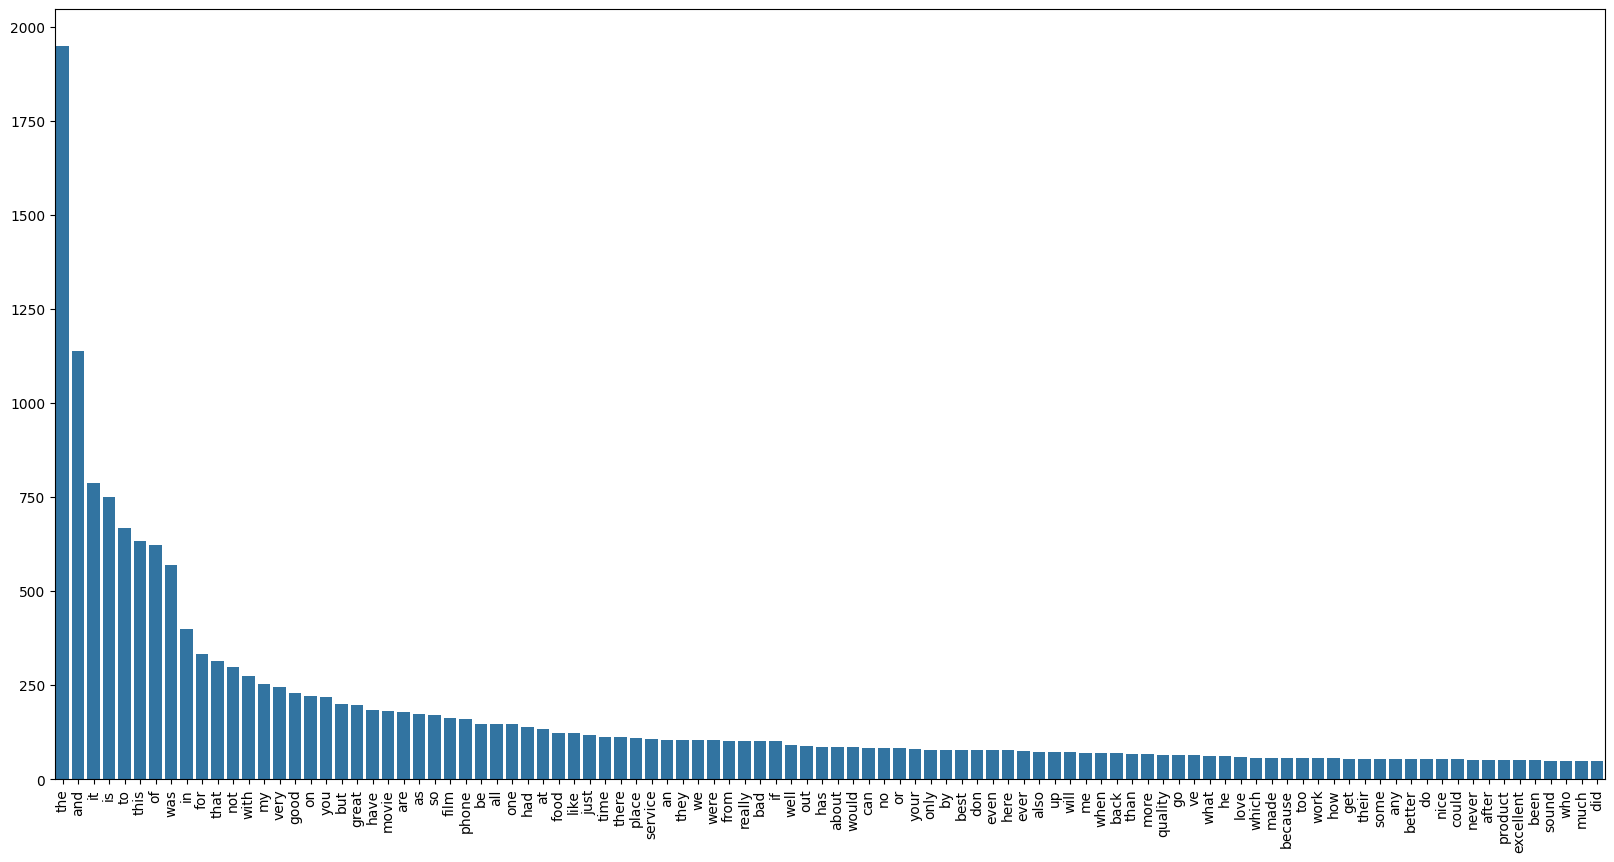

In [110]:
# I extract the top 100 terms and their frequencies
sorted_indices = np.argsort(term_frequencies)[::-1]
top_100_indices = sorted_indices[:100]

# Get the top 100 terms and their frequencies
top_100_terms = count_vect.get_feature_names_out()[top_100_indices]
top_100_frequencies = term_frequencies[top_100_indices]

plt.subplots(figsize=(20, 10))
g = sns.barplot(x=top_100_terms, y=top_100_frequencies)
g.set_xticklabels(top_100_terms, rotation=90)

Finding Frequent Patterns

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
df_categories = df['file'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in df_categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['file'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()                       # Initialize the CountVectorizer
    df_counts = count_vect.fit_transform(df['sentence'])  # Transform the sentence data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in df_categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])
filt_term_document_dfs

{'amazon_cells_labelled':      10  100  11  12  13  15  15g  18  20  2000  ...  wrongly  year  years  \
 0     0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 1     0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 2     0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 3     0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 4     0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 ..   ..  ...  ..  ..  ..  ..  ...  ..  ..   ...  ...      ...   ...    ...   
 975   0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 976   0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 977   0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 978   0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 979   0    0   0   0   0   0    0   0   0     0  ...        0     0      0   
 
      yell  yes  yet  you

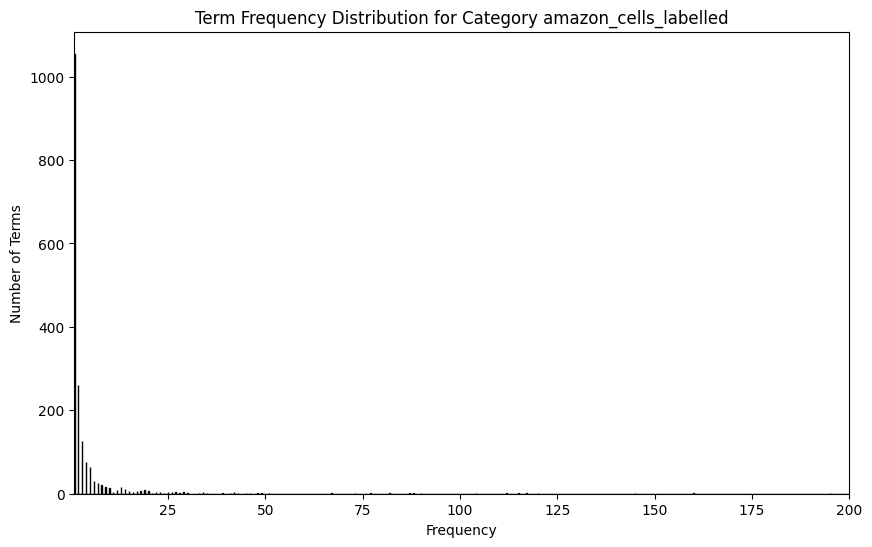

In [112]:
category_number=0                       # You can change it from 0 to 2
word_counts = filt_term_document_dfs[df_categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {df_categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

Dimension Reduction

In [113]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import umap.umap_
from umap import UMAP

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_senti = PCA(n_components=2).fit_transform(df_counts.toarray())
X_tsne_senti = TSNE(n_components=2).fit_transform(df_counts.toarray())
X_umap_senti = UMAP(n_components=2).fit_transform(df_counts.toarray())

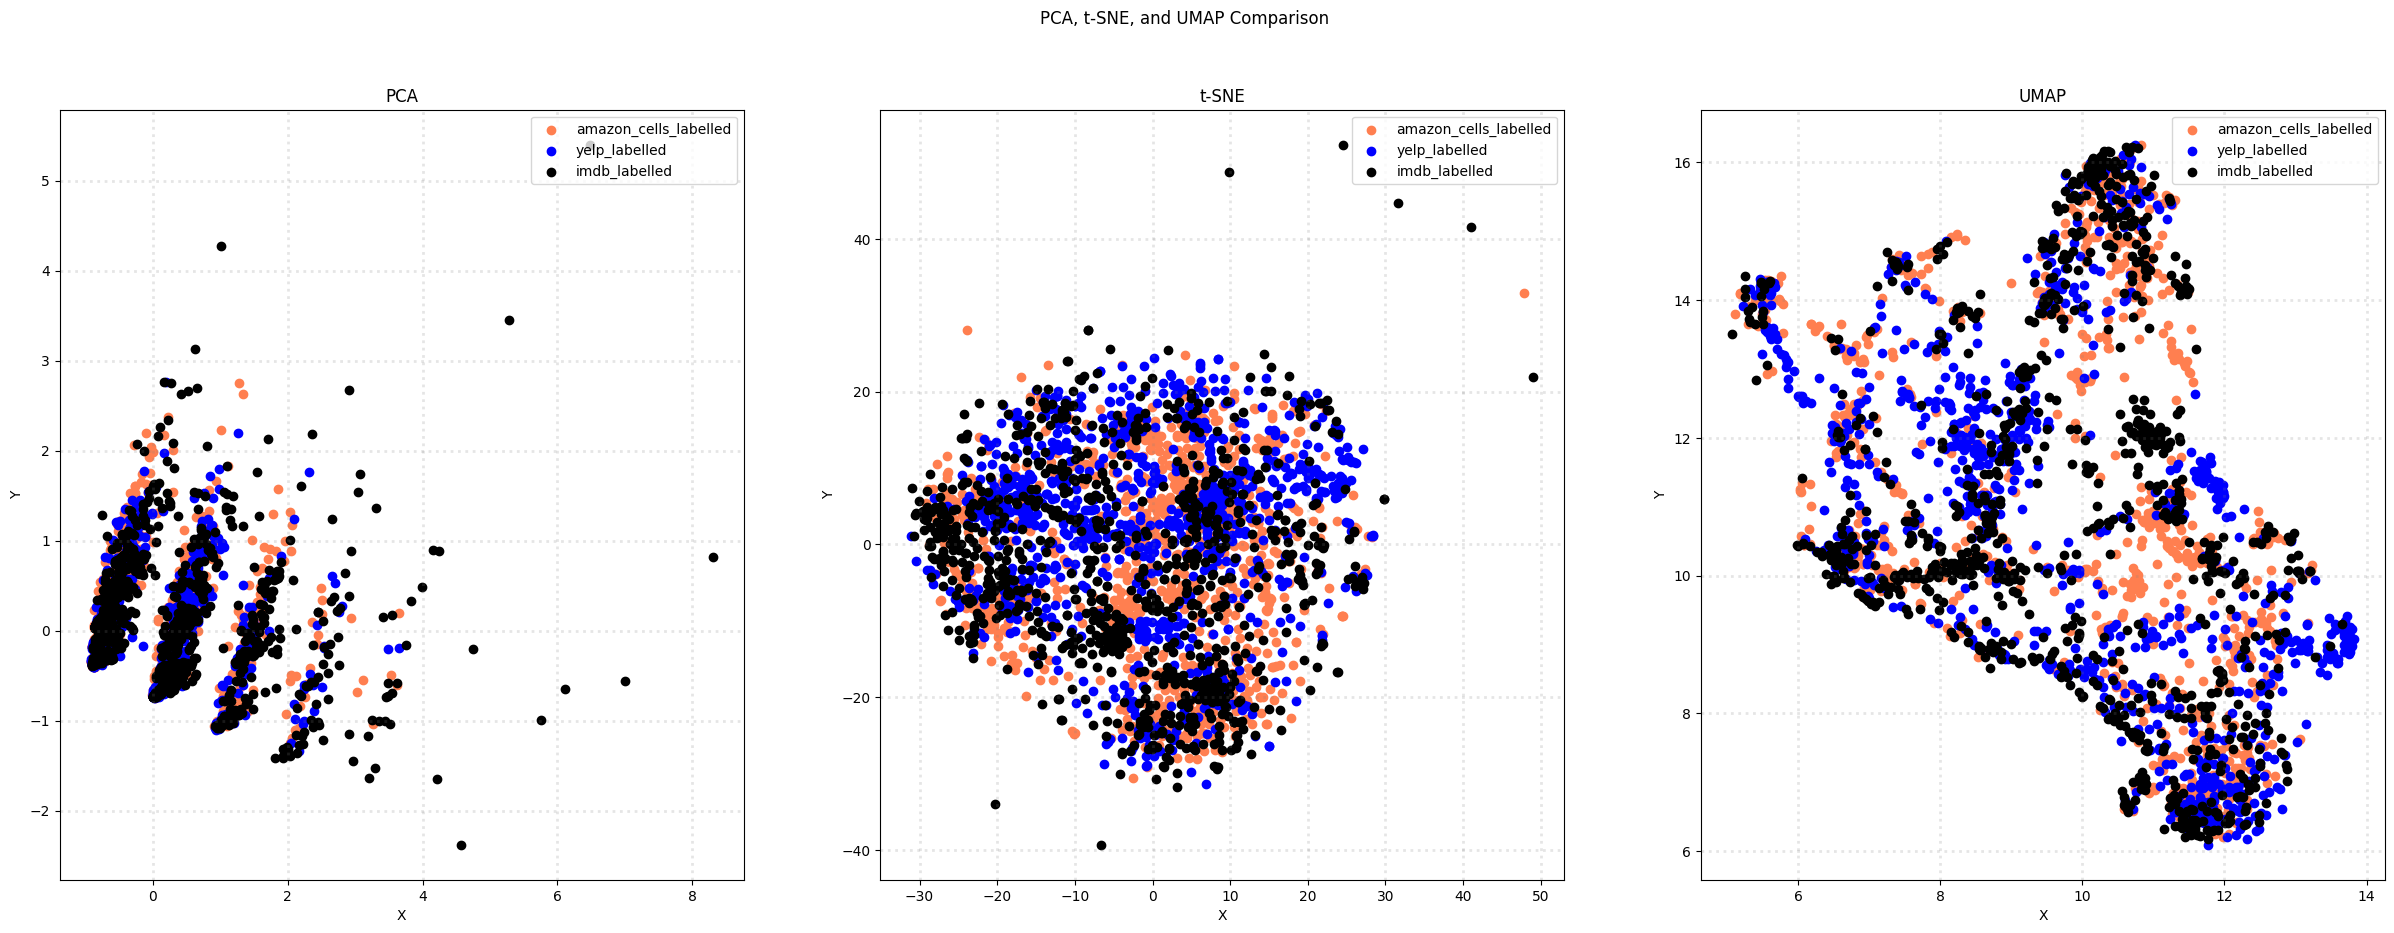

In [114]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
df_categories = df['file'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, df_categories):
        xs = X_reduced[df['file'] == category].T[0]
        ys = X_reduced[df['file'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_senti, 'PCA')
plot_scatter(axes[1], X_tsne_senti, 't-SNE')
plot_scatter(axes[2], X_umap_senti, 'UMAP')

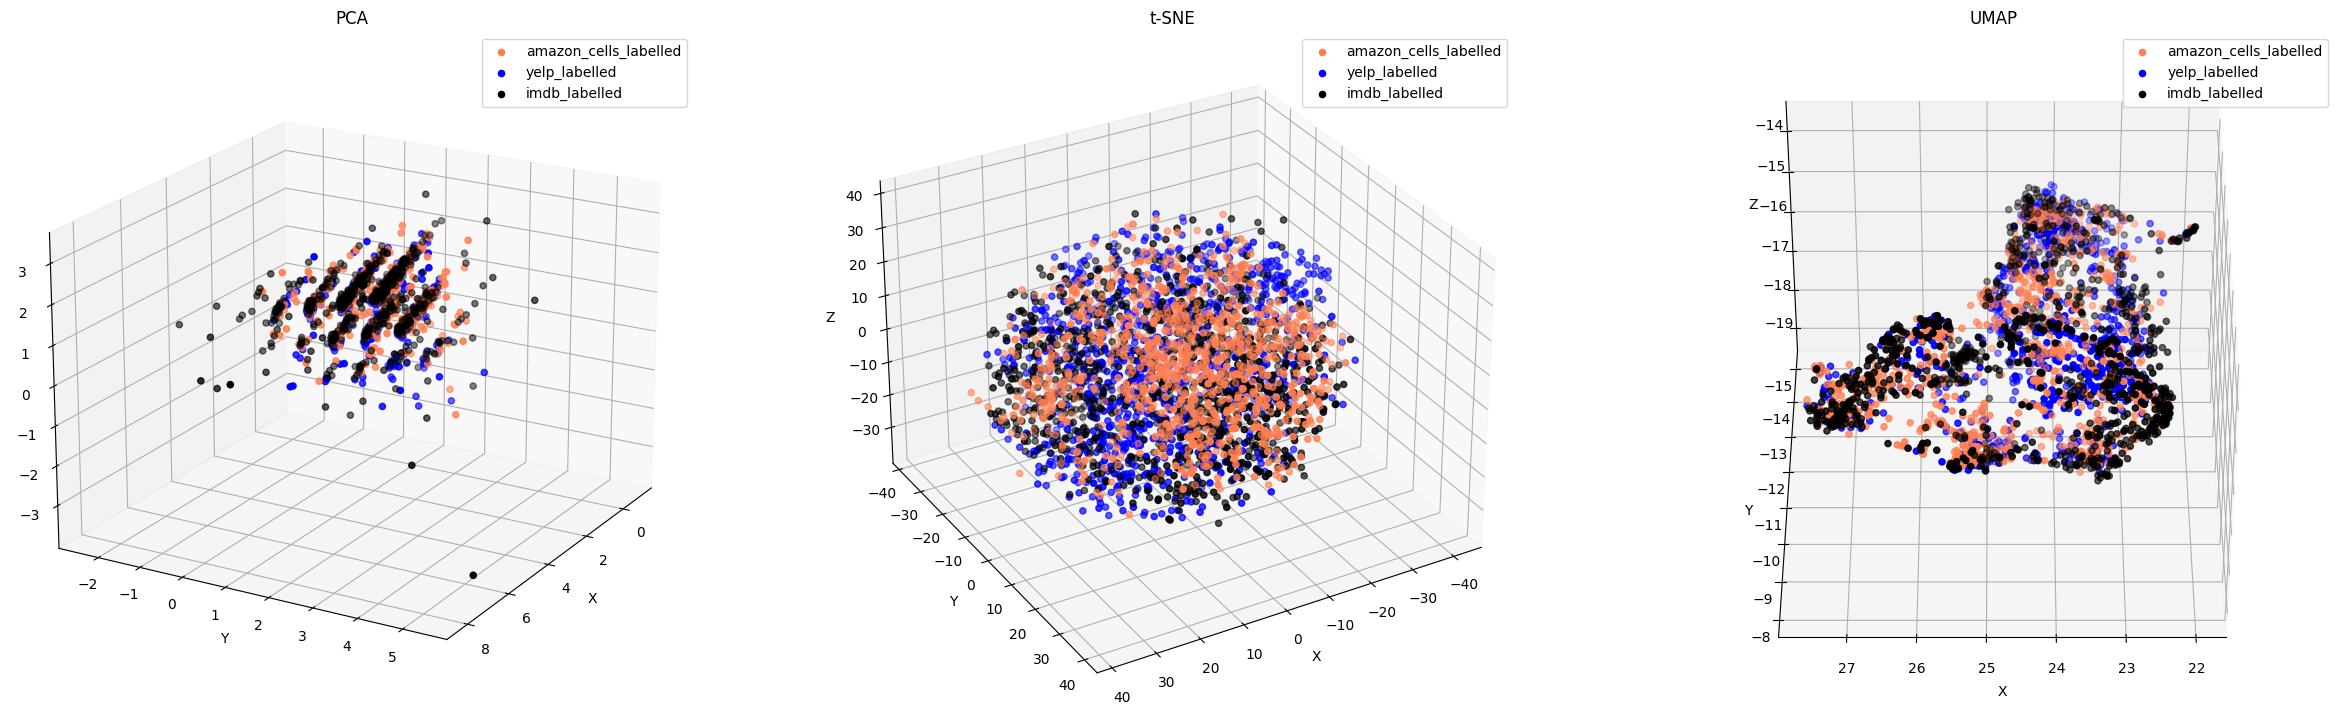

In [115]:
X_pca_senti_3d = PCA(n_components=3).fit_transform(df_counts.toarray())
X_tsne_senti_3d = TSNE(n_components=3).fit_transform(df_counts.toarray())
X_umap_senti_3d = UMAP(n_components=3).fit_transform(df_counts.toarray())

def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, df_categories):
        xs = X_reduced[df['file'] == category].T[0]
        ys = X_reduced[df['file'] == category].T[1]
        zs = X_reduced[df['file'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

fig = plt.figure(figsize=(30, 10))

# Create 3D subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_senti_3d, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_senti_3d, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_senti_3d, 'UMAP')

# Set different camera positions
ax1.view_init(elev=20, azim=30)
ax2.view_init(elev=30, azim=60)
ax3.view_init(elev=40, azim=90)

plt.show()

Discretization and Binarization

In [116]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(df['file'])
df['binary_file_name'] = mlb.transform(df['file']).tolist()
df[:10]


sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   
5  I have to jiggle the plug to get it to line up...     0   
6  If you have several dozen or several hundred c...     0   
7        If you are Razr owner...you must have this!     1   
8                Needless to say, I wasted my money.     0   
9                   What a waste of money and time!.     0   

                    file                                           unigrams  \
0  amazon_cells_labelled  [So, there, is, no, way, for, me, to, plug, it...   
1  amazon_cells_labelled               [Good, case, ,, Excellent, value, .]   
2  amazon_cells_labelled                      [Great, for, the, jawbone, .]   
3  amazon_cells_labelled  [Tied, to, charger, for, conversations, lastin...   
4  amazon_cells_labelled                           [The, mic, is, great, .]   
5  amazon_cells_labelled  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  amazon_cells_labelled  [If, you, have, several, dozen, or, several, h...   
7  amazon_cells_labelled  [If, you, are, Razr, owner, ..., you, must, ha...   
8  amazon_cells_labelled    [Needless, to, say, ,, I, wasted, my, money, .]   
9  amazon_cells_labelled       [What, a, waste, of, money, and, time, !, .]   

  binary_file_name  
0        [1, 0, 0]  
1        [1, 0, 0]  
2        [1, 0, 0]  
3        [1, 0, 0]  
4        [1, 0, 0]  
5        [1, 0, 0]  
6        [1, 0, 0]  
7        [1, 0, 0]  
8        [1, 0, 0]  
9        [1, 0, 0]

##### 4. Data Exploration - Cosine Similarity

In [119]:
# randomly choose 3 numbers from 0 to df.shape[0]
np.random.seed(2)
random_index = np.random.randint(0, df.shape[0], 3)

document_to_transform_1 = []
random_record_1 = df.iloc[random_index[0]]
document_to_transform_1.append(random_record_1['sentence'])

document_to_transform_2 = []
random_record_2 = df.iloc[random_index[1]]
document_to_transform_2.append(random_record_2['sentence'])

document_to_transform_3 = []
random_record_3 = df.iloc[random_index[2]]
document_to_transform_3.append(random_record_3['sentence'])

In [120]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.087039
Cosine Similarity using count bw 1 and 3: 0.288675
Cosine Similarity using count bw 2 and 3: 0.075378
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_2514377/916081315.py:24: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_2514377/916081315.py:25: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_2514377/916081315.py:26: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_2514377/916081315.py:28: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before p

**Observation:** Cosine Similarity using [1,1], [2,2], [3,3] are more silmilar to each other comparing to cosine similarity from different categories. Notice that the sentences in the same category are not always similar to each other. If the sentences express in totally different words, the cosine similarity will be closed to zero in this way even though they are in the same category.

### **Third: Visualization / TF-IDF / Naive Bayes Classifier**

#### 1. Generate meaningful new data visualizations

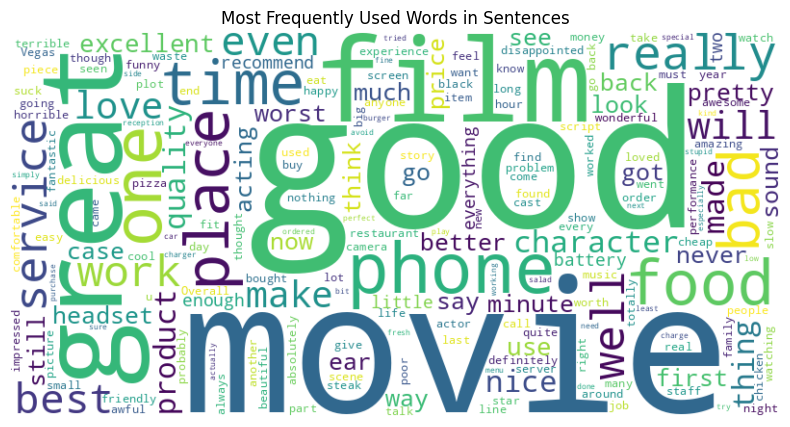

In [121]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Combine all sentences into a single string
text = " ".join(sentence for sentence in df['sentence'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Used Words in Sentences')
plt.show()

In [ ]:
# Candidate for document-level visualization
'''
# Dendrogram
linked = linkage(df_counts.toarray(), 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_counts[:10].toarray(), cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Document-Term Matrix (First 10 Documents)')
plt.show()

# Topic Models using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(df_counts)
topics = lda.transform(df_counts)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, count_vect.get_feature_names_out(), no_top_words)
'''

#### 2. TD-IDF

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.sentence)


In [141]:
terms = tfidf.get_feature_names_out()

# sum tfidf frequency of each term through documents
sums = tfidf_matrix.sum(axis=0)

In [152]:
row = []
for i in range(tfidf_matrix.shape[0]):
    row.append("sen_"+str(i))
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = terms, index = row)
print(tfidf_matrix.shape)
print(df_tfidf.shape)
df_tfidf.head()

(2966, 5153)
(2966, 5153)


00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
sen_0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
sen_1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
sen_2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
sen_3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
sen_4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

       yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
sen_0  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_1  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_2  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_3  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
sen_4  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[5 rows x 5153 columns]

#### 3. Naive Bayes Classifier

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [154]:
row = []
for i in range(df_counts.shape[0]):
    row.append("sen_"+str(i))
df_word_freq = pd.DataFrame(df_counts.toarray(), columns=count_vect.get_feature_names_out(), index=row)
y = pd.DataFrame(df['score'], columns = ['score']).values.ravel()


Word Frequency Classifier

In [157]:
X_train, X_test, y_train, y_test = train_test_split(df_word_freq, y, test_size = 0.3, stratify = y)

param_grid = {}
param_grid['alpha'] = [ 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 5)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc: %.3f with %s' % (grid_result.best_score_, grid_result.best_params_))

best acc: 0.809 with {'alpha': 1.0}


TF-IDF Classifier

In [158]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, y, test_size = 0.3, stratify = y)
# Naive Bayes
param_grid = {}
param_grid['alpha'] = [ 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 5)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc: %.3f with %s' % (grid_result.best_score_, grid_result.best_params_))

best acc: 0.809 with {'alpha': 2.0}


**Observation:** None of each can definitely perform better than the other. In my observation, sometimes word frequencty classifier have a higher acc, sometimes TF-IDF, however, the acc difference is small, both of their acc are mostly around 0.809.

### **Fourth: Advice for Data preprocessing/Visualization Improvement**